In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

from astropy.io import fits
import astropy.units as u
from astropy.visualization import quantity_support

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import mixture

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "cm",
      "font.size" : "12",
      "figure.figsize" : [16,8]}
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [2]:
#catalogues
mpajhu = '../catalogues/sdss_mpajhu_catalogue.fits'
passive = '../catalogues/sdss_portsmouth_passive_catalogue.fits'
starforming = '../catalogues/sdss_portsmouth_starforming_catalogue.fits'
HI = '../catalogues/AlfaAlfa_SDSS.fits'
mp_HI = '../catalogues/mp_HI.fits'
cross = '../catalogues/cross.fits' #matches of the 3 catalogues(mpajhu, HI, starforming)

catalogues = [mpajhu, passive, starforming, HI, mp_HI, cross]

In [3]:
#dictionaries
data = {
    
}

header = {
    
}

for cat in catalogues:
    hdul = fits.open(cat)
    data[cat] = hdul[1].data
    header[cat] = hdul[1].header
    hdul.close()

In [4]:
print(header[mpajhu])

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   72 / length of dimension 1                          NAXIS2  =              1472581 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    9 / number of table fields                         TTYPE1  = 'SDSS_SpecObjID'                                                      TFORM1  = 'K       '                                                            TTYPE2  = 'RA_degree'                                                           TFORM2  = 'D       '                                                            TTYPE3  = 'Dec_degree'                  

In [5]:
print(header[HI])

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional table                            NAXIS1  =                   44 / width of table in bytes                        NAXIS2  =                31501 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group                                 TFIELDS =                    8 / number of columns                              EXTNAME = 'Joined  '           / table name                                     TTYPE1  = 'AGC_1   '           / label for column 1                             TFORM1  = 'J       '           / format for column 1                            TTYPE2  = 'ObjID   '           / label for column 2                             TFORM2  = 'K       '           / format 

In [6]:
print(header[starforming])

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   64 / length of dimension 1                          NAXIS2  =               943001 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    8 / number of table fields                         TTYPE1  = 'SDSS_SpecObjID'                                                      TFORM1  = 'K       '                                                            TTYPE2  = 'RA_degree'                                                           TFORM2  = 'D       '                                                            TTYPE3  = 'Dec_degree'                  

In [7]:
header[cross]

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                  188 / width of table in bytes                        
NAXIS2  =                13537 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   26 / number of columns                              
EXTNAME = 'Joined  '           / table name                                     
TTYPE1  = 'SDSS_SpecObjID_1'   / label for column 1                             
TFORM1  = 'K       '           / format for column 1                            
TTYPE2  = 'RA_degree_1'        / label for column 2                             
TFORM2  = 'D       '        

## initial plots

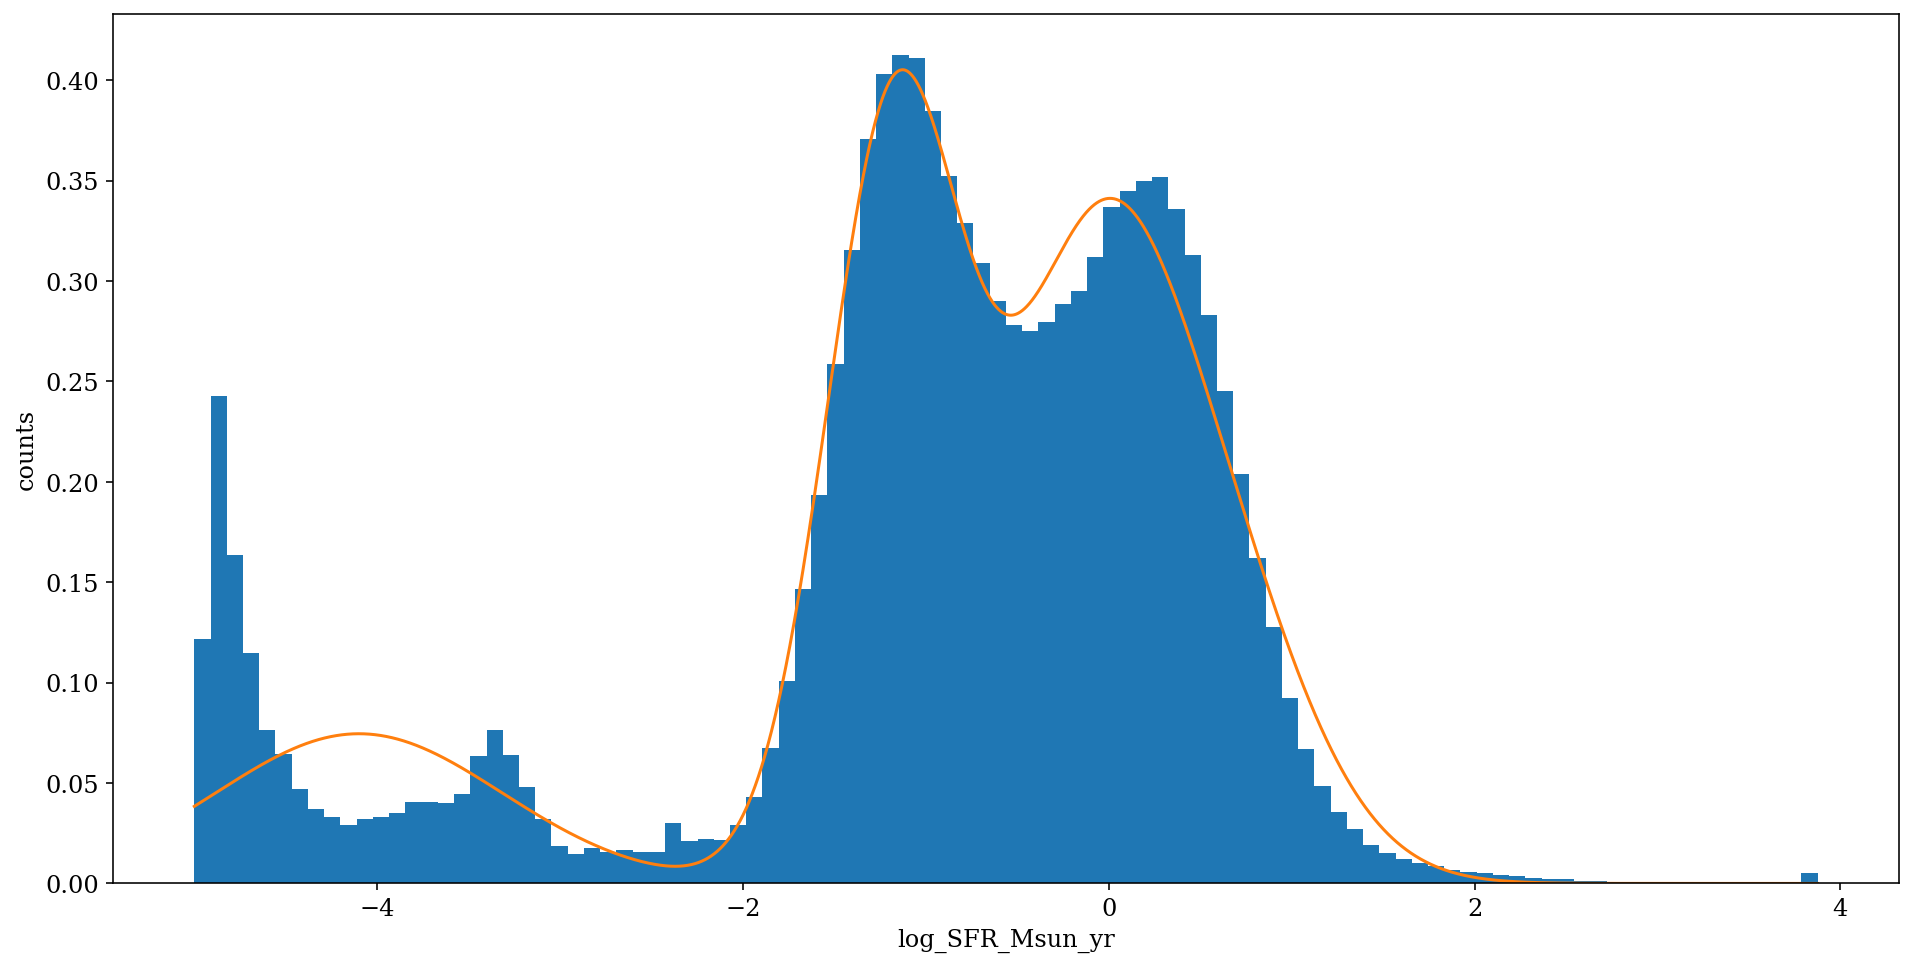

In [8]:
#histo SFR mpajhu 
key = 'log_SFR_Msun_yr'
sfr_mp = data[mpajhu].field(key)[data[mpajhu].field(key) > -9.99e3]
sfr_mp = sfr_mp[:, np.newaxis]

gm = mixture.GaussianMixture(n_components = 4, tol = 1e-3, n_init = 1)
gm_fitted = gm.fit(sfr_mp)
sfr_sorted = np.sort(sfr_mp, axis = 0)

plt.hist(sfr_mp[:,0], bins = 100, density = True)
plt.plot(sfr_sorted[:,0], np.exp(gm_fitted.score_samples(sfr_sorted)))
plt.xlabel(key)
plt.ylabel('counts')
plt.show()

In [9]:
print('the means are: ')
print(gm_fitted.means_)

print('\nthe covariances are: ')
print(gm_fitted.covariances_)

the means are: 
[[ 0.40108872]
 [-1.17218817]
 [-4.09995016]
 [-0.17269028]]

the covariances are: 
[[[0.30823016]]

 [[0.13810948]]

 [[0.61026522]]

 [[0.20278517]]]


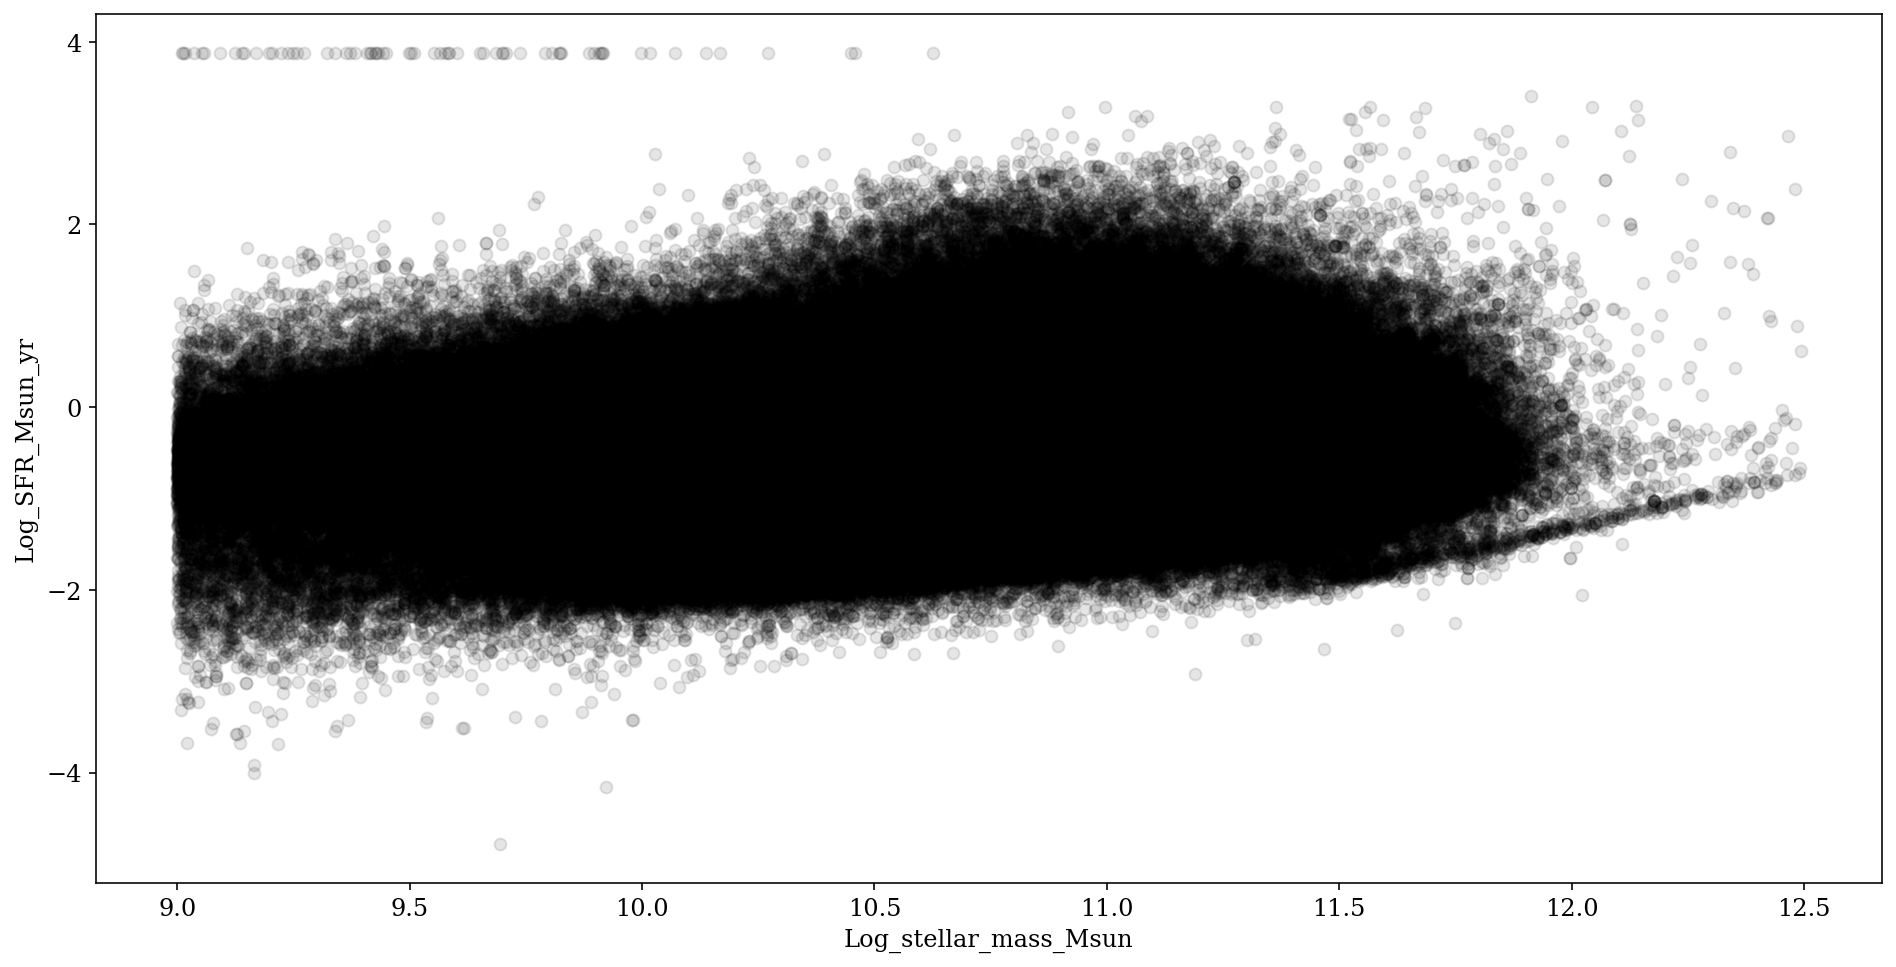

In [10]:
key_x = 'Log_stellar_mass_Msun'
key_y = 'Log_SFR_Msun_yr'

mask = (data[mpajhu].field(key_x) > -9.99e3) & (data[mpajhu].field(key_y) > -9.99e3) & (data[mpajhu].field('Log_stellar_mass_Msun') > 9)

x = data[mpajhu].field(key_x)[mask]
y = data[mpajhu].field(key_y)[mask]

plt.xlabel(key_x)
plt.ylabel(key_y)

plt.scatter(x, y, c='k', alpha = .1)
#plt.hist2d(x, y, bins = 100, cmap = 'binary')
#plt.colorbar()
plt.show()

### clustering

In [11]:
# K means with 2 clusters
n_clusters = 2
clf = KMeans(n_clusters = n_clusters)

X = np.array([x, y]).T #right shape for the fit module
clf.fit(X)
centers = clf.cluster_centers_ 
labels = clf.predict(X)

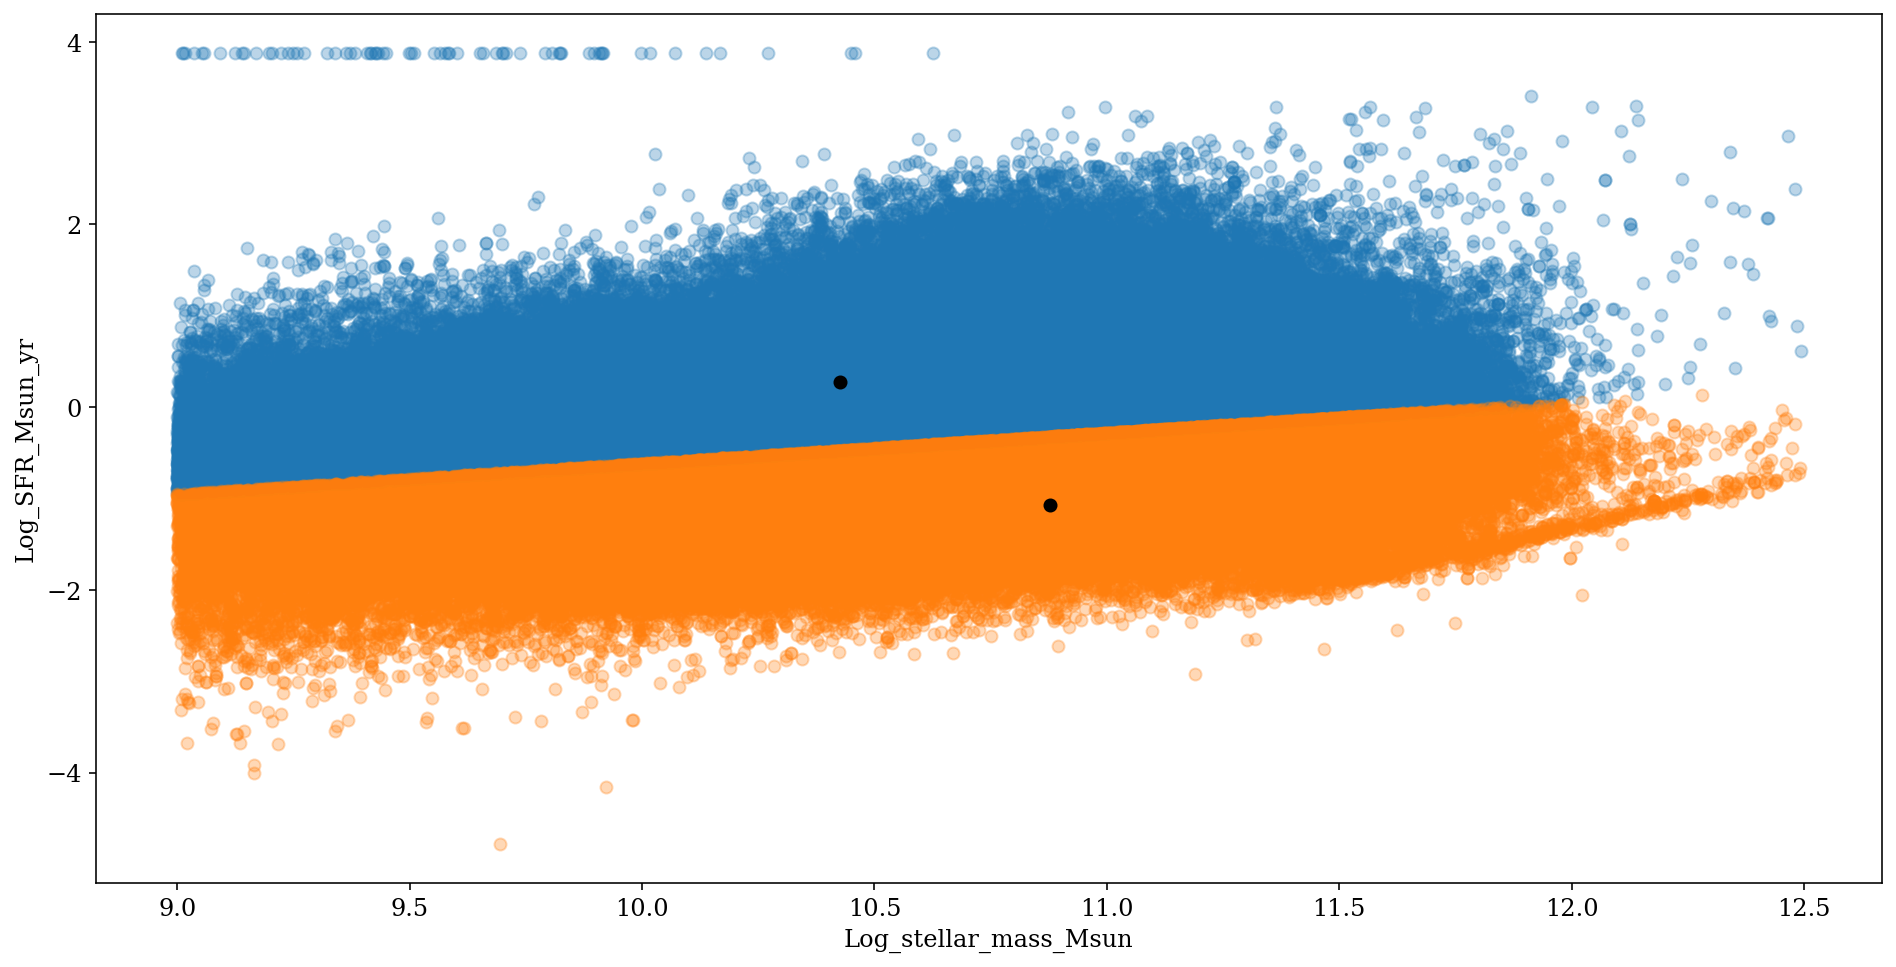

In [12]:
plt.figure()
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], alpha = 0.3)
plt.scatter(centers[:, 0], centers[:, 1], c='k')

plt.xlabel(key_x)
plt.ylabel(key_y)

#plt.loglog()
plt.show()

In [13]:
print(centers)

[[10.42498852  0.27813475]
 [10.87846724 -1.07437451]]


## gas consumption timescale (GCT)

In [14]:
mask = (data[cross].field('logMHI') > -9.99e3) & (data[cross].field('log_SFR_Msun_yr') > -9.99e3)

log_mass_HI = data[cross].field('logMHI')[mask]
log_sfr = data[cross].field('log_SFR_Msun_yr')[mask]
age = data[cross].field('Age_Gyr')[mask] * 1e9 #age in yr
gct = 10**(log_mass_HI - log_sfr) #gas consumption timescale in yr

In [15]:
mask = (data[mp_HI].field('logMHI') > -9.99e3) & (data[mp_HI].field('log_SFR_Msun_yr') > -9.99e3)

log_mass_HI_2 = data[mp_HI].field('logMHI')[mask]
log_sfr_2 = data[mp_HI].field('log_SFR_Msun_yr')[mask]

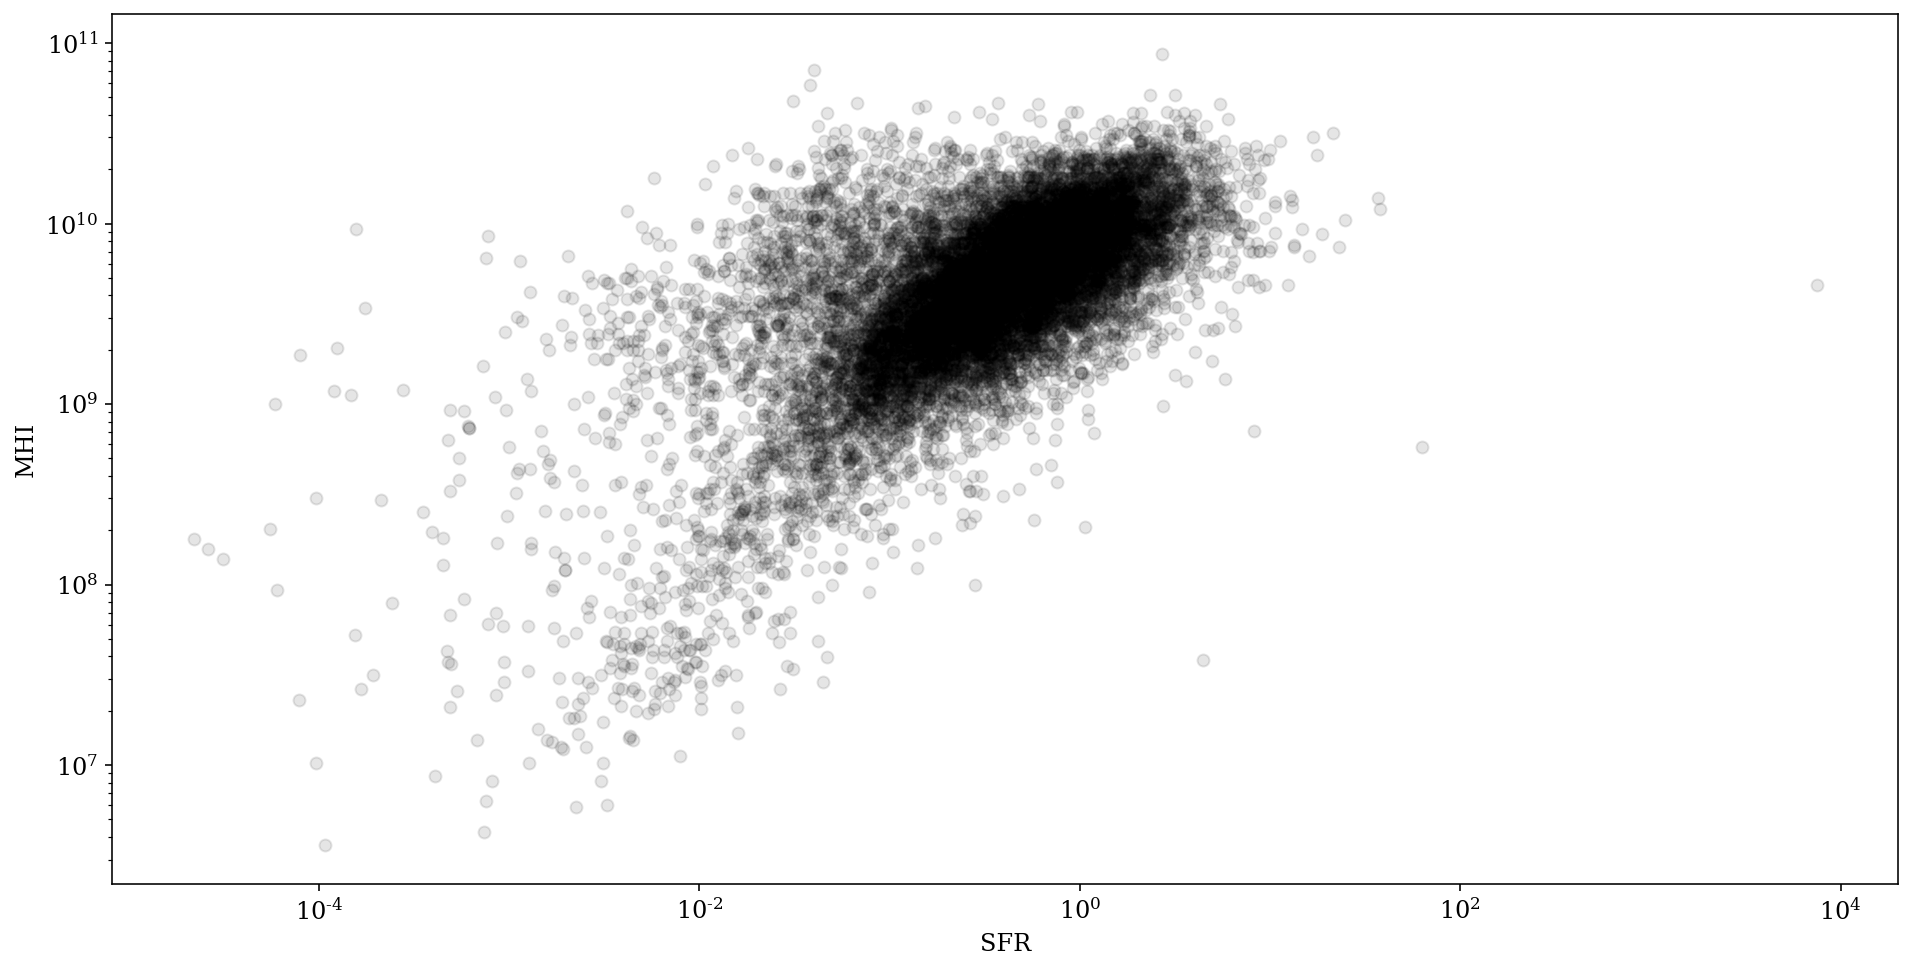

In [18]:
with quantity_support():
    plt.scatter(10**log_sfr, 10**log_mass_HI, c='k', alpha = 0.1)
    plt.xlabel('SFR')
    plt.ylabel('MHI')
    #plt.ylabel('logMHI')
    plt.loglog()
    #plt.title('timescales')

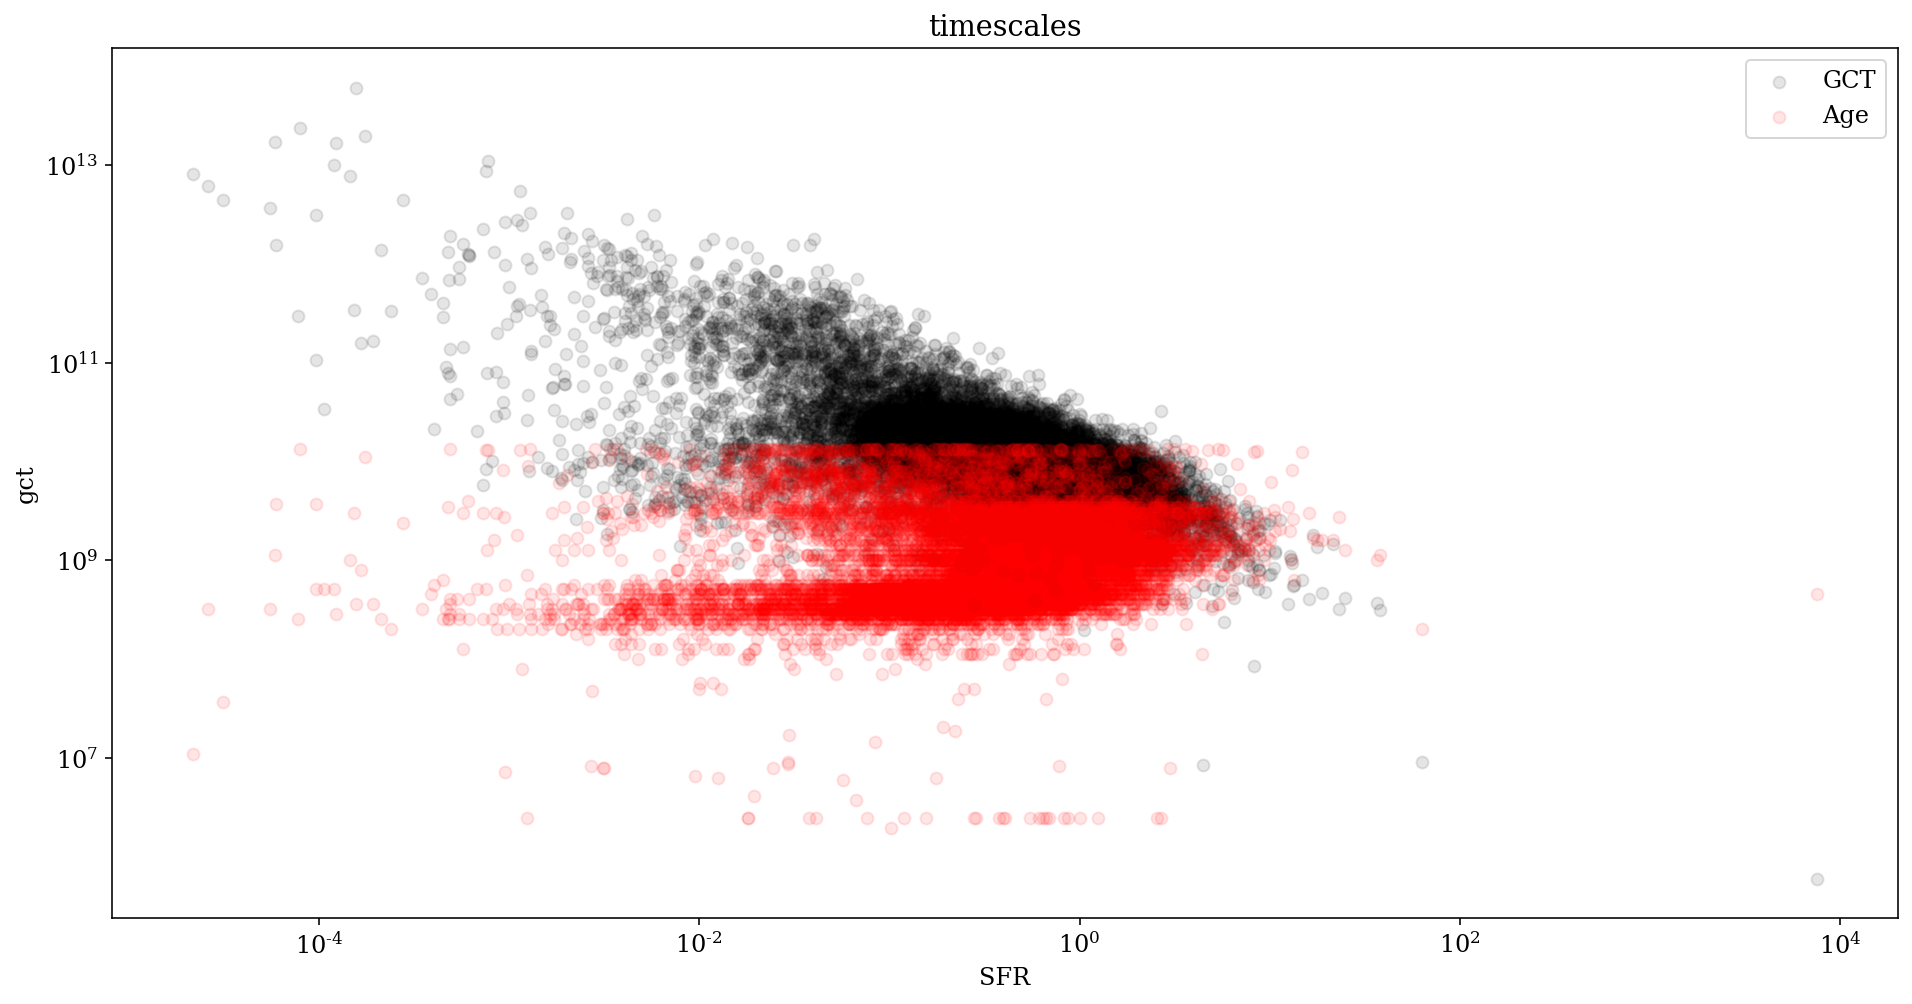

In [17]:
with quantity_support():
    plt.scatter(10**log_sfr, gct, c='k', alpha = 0.1, label = 'GCT')
    plt.scatter(10**log_sfr, age, c='r', alpha = 0.1, label = 'Age')
   # plt.scatter(log_sfr_2, log_mass_HI_2, c='b', alpha = 0.1)
    plt.xlabel('SFR')
    plt.ylabel('gct')
    #plt.ylabel('logMHI')
    plt.loglog()
    plt.legend()
    plt.title('timescales')